# 一、逻辑回归

# 1 处理数据

### 1.1 导入数据

In [1]:
import pandas as pd
import numpy as np
train=pd.read_csv(r"E:/ML/logistic/adult.data",header=None,na_values=' ?')
test=pd.read_csv(r"E:/ML/logistic/adult.test",header=None,na_values=' ?')
name=['age','workclass','fnlwgt','education','education_num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country',"income"]
train.columns=name
test.columns=name
train.head()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 1.2 处理缺失值（删除）

In [2]:
#查看空值行概览
test.isnull().sum()
train.isnull().sum()
#查看空值行的信息
test[(test['occupation'].isnull().values==True)|(test['workclass'].isnull().values==True)|(test['native-country'].isnull().values==True)]
train[(train['occupation'].isnull().values==True)|(train['workclass'].isnull().values==True)|(train['native-country'].isnull().values==True)]
test = test.reset_index(drop=True)
train = train.reset_index(drop=True)
#删除空值行
test=test.dropna(axis=0)
train=train.dropna(axis=0)

### 1.3 分离并处理X，Y

In [3]:
Y_train=train["income"]   
Y_train=np.where(Y_train==' >50K',1,0)         #Y训练集  
X_train=train.drop('income',axis=1)           #X_训练集 
Y_test=test["income"]
Y_test=np.where(Y_test==' >50K.',1,0)           #Y测试集
X_test=test.drop('income',axis=1)
Y_test

array([0, 0, 1, ..., 0, 0, 1])

###  1.4类别型变量生成哑变量（onehotencode）

#### 因为pandas.get_dummies函数的原因，对训练集、测试集分开生成哑变量会出现问题。有类型在训练集出现却并未在测试集出现.因此需要先将X训练集和测试集合并，生成哑变量后再分离

In [4]:
X_temp=pd.concat([X_train,X_test],axis=0)      #X测试集  
L=X_train.shape[0]
#pd.get_dummies(X_train,columns=['workclass','education','marital-status','occupation','relationship','race','sex','native-country'])
X_temp=np.array(pd.get_dummies(X_temp))
X_train=X_temp[0:L]                         
X_test=X_temp[L:]               

### 1.5 最小最大归一

In [5]:
from sklearn.preprocessing import MinMaxScaler 
le=MinMaxScaler()
X_train=le.fit_transform(X_train)
X_test=le.fit_transform(X_test)
pd.DataFrame(X_train).head(5)

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.301370,0.043338,0.800000,0.02174,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.452055,0.047277,0.800000,0.00000,0.0,0.122449,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.287671,0.137244,0.533333,0.00000,0.0,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.493151,0.150212,0.400000,0.00000,0.0,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.150685,0.220703,0.800000,0.00000,0.0,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 1.6 添加一列‘1’

In [6]:
X_test=np.c_[np.ones(X_test.shape[0]),X_test]
X_train=np.c_[np.ones(X_train.shape[0]),X_train]

# 2 训练与测试

### 定义逻辑函数：

In [7]:
def logit(x):
    return 1./(1+np.exp(-x))

### 2.1 梯度下降训练

In [8]:
m,n=X_train.shape
a=0.00065
w=np.random.rand(n)
for i in range(m):
    loss=logit(np.dot(w.T,X_train[i]))-Y_train[i]
    for j in range(n):
        w[j]=w[j]-a*loss*X_train[i][j]

### 2.2 测试

In [9]:
Y_predict=np.dot(X_test,w)
Y_predict=logit(Y_predict)
pd.concat([pd.DataFrame(Y_predict),pd.DataFrame(Y_test)],axis=1)

,0,0
0,0.097576,0
1,0.231875,0
2,0.572544,1
3,0.355911,1
4,0.042787,0
5,0.690184,1
6,0.044452,0
7,0.307291,0
8,0.329666,1
9,0.426747,0


### 2.3 评估结果
##### 2.3.1 求roc_auc_score

In [11]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
#roc_auc=roc_auc_score(Y_test,Y_predict)
fpr, tpr, thersholds=roc_curve(Y_test,Y_predict)
roc_auc=auc(fpr,tpr)
print("逻辑回归roc值：",roc_auc)

逻辑回归roc值： 0.8193512204986677


##### 2.3.2 绘制roc曲线

w=np.random.rand(n)
a=0.005
for iter in range(100):
    for j in range(n):
        sum=0
        for i in range(m):
            sum=sum+(Y_train[i]-np.dot(w.T,X_train[i]))*X_train[i,j] 
        w[j]=w[j]+a*sum

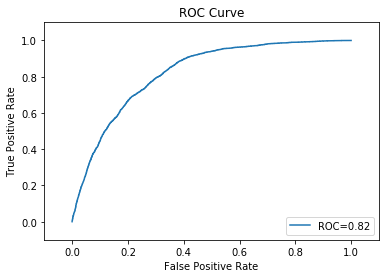

In [13]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr,label='ROC={0:.2f}'.format(roc_auc))
plt.xlim([-0.1, 1.1])  # 设置x、y轴的上下限，以免和边缘重合，更好的观察图像的整体
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')  
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

##### 2.3.2 计算准确率

In [14]:

for i in range(len(Y_predict)):
    if Y_predict[i]>0.5:
        Y_predict[i]=1
    else:
        Y_predict[i]=0    
right=0
for i in range(len(Y_test)):
    if Y_test[i]==Y_predict[i]:
         right+=1
score=right/len(Y_test)
print("逻辑回归正确率为：",score)

逻辑回归正确率为： 0.7873173970783532


---

# 二、朴素贝叶斯
* 连续型变量用高斯密度函数估计概率
* 离散变量的条件概率分布估计

## 1 处理数据集

###  1.1 导入数据

In [12]:
import pandas as pd
import numpy as np
train=pd.read_csv(r"E:/ML/logistic/adult.data",header=None,na_values=' ?')
test=pd.read_csv(r"E:/ML/logistic/adult.test",header=None,na_values=' ?')
name=['age','workclass','fnlwgt','education','education_num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country',"income"]
train.columns=name
test.columns=name
train.head()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 1.2 处理空值

In [13]:
#查看空值行概览
test.isnull().sum()
train.isnull().sum()

#查看空值行的信息
test[(test['occupation'].isnull().values==True)|(test['workclass'].isnull().values==True)|(test['native-country'].isnull().values==True)]
train[(train['occupation'].isnull().values==True)|(train['workclass'].isnull().values==True)|(train['native-country'].isnull().values==True)]
test = test.reset_index(drop=True)
train = train.reset_index(drop=True)

#删除空值行
test=test.dropna(axis=0)
train=train.dropna(axis=0)

###  1.3 获取X,Y

In [14]:
# y训练集 这里设置为二值
y_train=train['income']
y_train=pd.Series(np.where(y_train==' <=50K',0,1))

#x训练集集 这里将不同class的x_train分别存储
x_train0=train.loc[train['income']==' <=50K'].drop('income',axis=1)
x_train1=train.loc[train['income']==' >50K'].drop('income',axis=1)

#测试集
x_test=test.iloc[:,:-1]                                         
y_test=test['income']                      
y_test=np.where(y_test==' >50K.',1,0)            

## 2 训练：实现需要的函数
* 计算不同类别的先验概率
* 计算不同类别的连续变量的标准差，均值
* 计算不同类别的离散变量的类条件概率
* 测试函数

### 2.1 计算不同类别的先验概率
*输入：y训练集*  
*返回：数组y_prior。*   
*y_prior[0]为class0的y先验概率*

In [15]:
def prior_by_class(y_train):
    '''
    计算两个类别的先验概率
    返回数组，y_prior[0]为0类别的先验概率
    '''
    y_prior=np.zeros(2)
    for i in range(len(y_train)):
        y_prior[y_train[i]]+=1
    y_prior=y_prior/len(y_train)
    return y_prior

### 2.2 计算不同类别的连续变量的标准差，均值
*参数：x_train，为某一class的训练集。*  
*返回：这个class的字典class_mean_std。*  
*(keys,values)为<特征名，数组>。数组[0]为该特征的mean，数组[1]为该特征的std*

In [16]:
def mean_std(x_train):
    '''
    x_train为某class类的训练集
    计算一个类别中连续变量的均值和方差
    返回字典class_mean_std。<keys,values>为<特征名，数组>。数组[0]为该特征的mean，数组[1]为该特征的std
    '''
    #获取连续变量的列名
    int_col=train.dtypes=='int64'
    int_col=list(int_col[int_col].index)
    class_mean_std={}
    #计算第i列的mean和std
    for i in int_col:
        vector=[]
        vector.append(np.mean(train[i]))
        vector.append(np.std(train[i]))
        class_mean_std[i]=vector
    return class_mean_std


### 2.3 计算不同类别的离散变量的类条件概率
*参数：某一class的训练集,type为DataFrame  
返回：字典class_feature  
class_feature的\<keys,values>为<特征的列名,feature字典>   
feature\<keys,values>为<特征的值,类条件概率> 
*

In [17]:
def posterior_by_class(x_train):
    #获取离散变量的列名
    obj_col=x_train.dtypes=='object'
    obj_col=list(obj_col[obj_col].index)
    class_feature={}
    
    #获取样本个数
    m=len(x_train)
    
    #求第i个特征列的各特征值的类条件概率
    for i in obj_col:
        #求第i个特征列的特征值的所有种类
        feature_name=x_train[i].value_counts().index
        feature={}
        
        #这里的三个循环分别是：初始化字典特征对应数量为0；扫描样本计算各特征值的样本数；计算各特征值的类条件概率
        for name in feature_name:
            feature[name]=0
        for j in range(m):
            feature[x_train[i].iloc[j]]+=1
        for name in feature_name:
            feature[name]=(feature[name]+1)/(m+len(feature))#拉普拉斯平滑
         #增加一个索引'unkown'，当初训练集出现未知类型时，拉普拉斯平滑(1/K)。
        feature['unknow']=1/len(feature)                      
        class_feature[i]=feature
    return class_feature

### 2.4 代入函数，训练得到参数

In [18]:
#先验概率
y_prior=prior_by_class(y_train)
#两类的连续变量的mean，std
class0_mean_std=mean_std(x_train0)
class1_mean_std=mean_std(x_train1)
#两类的离散变量的类条件概率
class0_posterior=posterior_by_class(x_train0)
class1_posterior=posterior_by_class(x_train1)

## 3 测试

### 3.1实现测试函数

In [ ]:
from scipy import stats
#预测函数的参数即为上面函数求得的返回值
def get_pridict(x_test,y_prior,class0_mean_std,class1_mean_std,class0_posterior,class1_posterior):
    '''
    计算class0和class1的概率
    较大概率类即为预测
    '''
    #样本个数
    m=len(x_test)
    y_predict=[]
    #特征的列名
    feature_name=x_test.columns
    for i in range(m):
        #预测概率初始化为先验概率
        class0=y_prior[0]
        class1=y_prior[1]
        #遍历单个样本的特征
        for name in feature_name:
            if x_test[name].dtype=='object':#如果为离散变量，计算类条件概率
            
                if x_test[name].iloc[i] in class0_posterior[name]:
                    class0*=class0_posterior[name][x_test[name].iloc[i]]
                else : #触发else：预测特征的特征值未在类训练样本出现
                    class0*=class0_posterior[name]['unknow']
                if x_test[name].iloc[i] in class1_posterior[name]:
                    class1*=class1_posterior[name][x_test[name].iloc[i]]
                else: #触发else：预测特征的特征值未在类训练样本出现
                    class1*=class1_posterior[name]['unknow']
            else: #否则为连续变量，计算x的高斯密度分布
                class0*=stats.norm.pdf(x_test[name].iloc[i],class0_mean_std[name][0],class0_mean_std[name][1])
                class1*=stats.norm.pdf(x_test[name].iloc[i],class1_mean_std[name][0],class1_mean_std[name][1])
        if class0>class1:
            y_predict.append(0)
        else:
            y_predict.append(1)
    return np.array(y_predict)

### 3.2测试

In [ ]:
y_predict=get_pridict(x_test,y_prior,class0_mean_std,class1_mean_std,class0_posterior,class1_posterior)

## 4 AUC评估

### 4.1 计算auc值

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
#roc_auc=roc_auc_score(Y_test,Y_predict)
fpr, tpr, thersholds=roc_curve(y_test,y_predict)
roc_auc=auc(fpr,tpr)
print("luo")

### 4.2 绘制roc曲线

##### 注：此处roc图绘错了

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr,label='auc={0:.2f}'.format(roc_auc))
plt.xlim([0., 1.0])  # 可设置x、y轴的上下限，以免和边缘重合，更好的观察图像的整体
plt.ylim([0., 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')  
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### 4.3 计算准确率

In [ ]:
right=0
for i in range(len(y_predict)):
    if y_predict[i]==Y_test[i]:
        right+=1
score=right/len(y_predict)        
print("朴素贝叶斯正确率：",score)